### Goal of this data clean is to find the best month for sales? How much was earned in that month

In [2]:
import numpy as np
import os
import pandas as pd

In [3]:
files = [file for file in os.listdir('/Users/samindraferdous/Desktop/projects/ML/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_month_csv = pd.DataFrame()  # making an empty Df

for file in files:
    currentFile = open("/Users/samindraferdous/Desktop/projects/ML/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file, 'rt', encoding='latin1')
    df = pd.read_csv(currentFile)
    all_month_csv = pd.concat([all_month_csv, df])


all_month_csv.to_csv("/Users/samindraferdous/Desktop/projects/ML/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_data.csv", index=False)


In [4]:
all_month_data = pd.read_csv("/Users/samindraferdous/Desktop/projects/ML/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_data.csv")

In [5]:
all_month_data.isnull().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
Unnamed: 0          186850
dtype: int64

In [6]:
all_month_data = all_month_data.drop(["Unnamed: 0"], axis=1)
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [7]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning Data set

In [8]:
# seeing how many complete rows are null 

nan_df = all_month_data[all_month_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# dropping nan columns

all_month_data = all_month_data.dropna(how="all")

# some month indexes have "Or" so clean up

all_month_data = all_month_data[all_month_data["Order Date"].str[0:2] != 'Or']
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [10]:
# making a new column Month by taking the 1st 2 index of the date col

all_month_data["Month"] = all_month_data["Order Date"].str[0:2] 

# month shouldnt be a str, should be an int so convert to int

all_month_data["Month"] = all_month_data["Month"].astype('int32')

##### another goal is to find how much was earned in the highest sale month? 
 so we can do Quantity ordered * price each and make a new col of it

In [11]:
# Add a sales column

# before calculating investigate if all are numerical to multiply

all_month_data.dtypes


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [12]:
# convert str to int to multiply

# using command to_numeric is to so it converts to the most suitable data type
all_month_data["Quantity Ordered"] = pd.to_numeric(all_month_data["Quantity Ordered"])
all_month_data["Price Each"] = pd.to_numeric(all_month_data["Price Each"])

all_month_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [13]:
all_month_data['Sales'] = all_month_data['Quantity Ordered'] * all_month_data['Price Each']

all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [14]:
# now can finally figure which month had greatest sales 

# sum of month sales

all_month_data.drop(['Quantity Ordered', 'Price Each'], axis=1)

all_month_data.groupby('Month').sum()


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/714113472.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_month_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/4158097135.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_month_data.groupby('Month').sum()


Text(0.5, 0, 'Months')

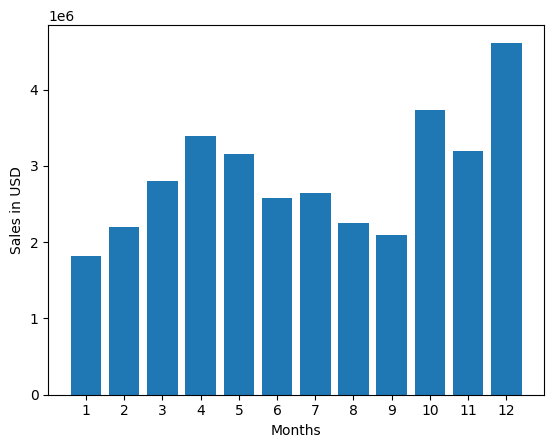

In [15]:
import matplotlib.pyplot as plt

results = all_month_data.groupby('Month').sum()
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')

### What city had the highest sales?


In [16]:
### extract the city col

# using the .apply() method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
     return address.split(',')[2].split(' ')[1]

all_month_data['City'] = all_month_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})" )

all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [17]:
all_month_data.groupby('City').sum()


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/2895201439.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_month_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/1710206207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_month_data.groupby('City').sum()


Text(0.5, 0, 'US City names')

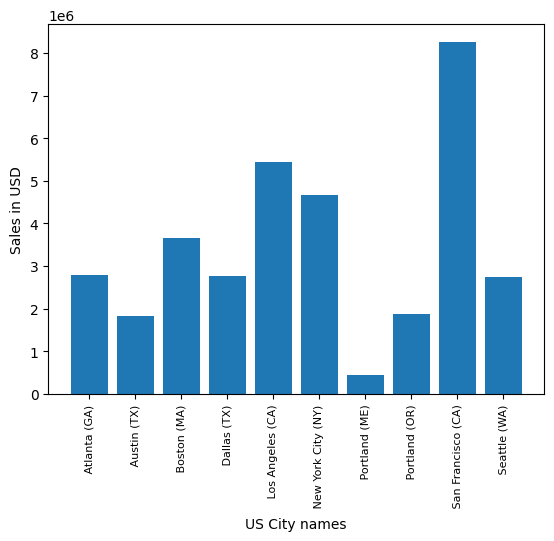

In [18]:
results = all_month_data.groupby('City').sum()
cities = [city for city, df in all_month_data.groupby('City')]   # .unique() dont work because the order of Sales and city matter.

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD')
plt.xlabel('US City names')

### What time should we display advertisement to maximise likelihood of customer buying projects

In [20]:
# Order date col in in str format, convert it to date time format

all_month_data['Order Date'] = pd.to_datetime(all_month_data['Order Date'])

In [24]:
# extract the hour & minute from the order date col to analyse

all_month_data['Hour_ofOrder'] = all_month_data['Order Date'].dt.hour
all_month_data['Minute_ofOrder'] = all_month_data['Order Date'].dt.minute

In [25]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour_ofOrder,Minute_ofOrder
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


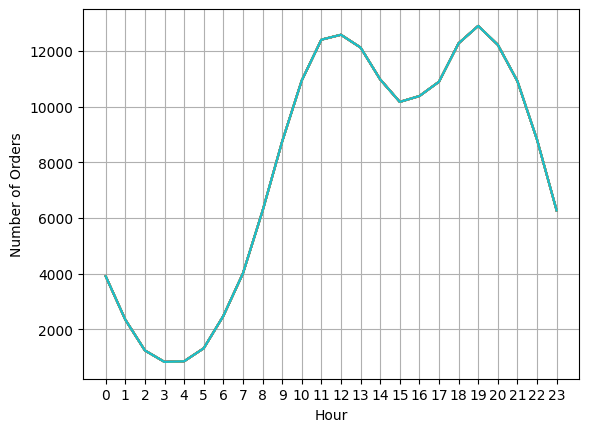

In [40]:
hours = [hour for hour, df in all_month_data.groupby('Hour_ofOrder')]

plt.plot(hours, all_month_data.groupby(['Hour_ofOrder']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# as per the plot, my recomendation is 11am or 7pm for advertisement

### What products are often sold together?

if order ID is same its ordered together

In [52]:
df = all_month_data[all_month_data['Order ID'].duplicated(keep=False)]

# lets group the same products in a new col using the order ID

df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # issue : will have duplicates

df = df[['Order ID','Grouped Products']].drop_duplicates()  # made a more consized table to answer the question

df.head()

/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/2192863429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))  # issue : will have duplicates


,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [59]:
# now we have the products grouped, we have to count the pairs bought together

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))  # if we want most common in 3 put 3 instead of 3
    
# print(count)  -> this prints all
# a nicer representation would be :

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### what product sold the most & why it sold the most?

In [73]:
all_month_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour_ofOrder,Minute_ofOrder
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/2344868351.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_quantity = product_grouped.sum()['Quantity Ordered']


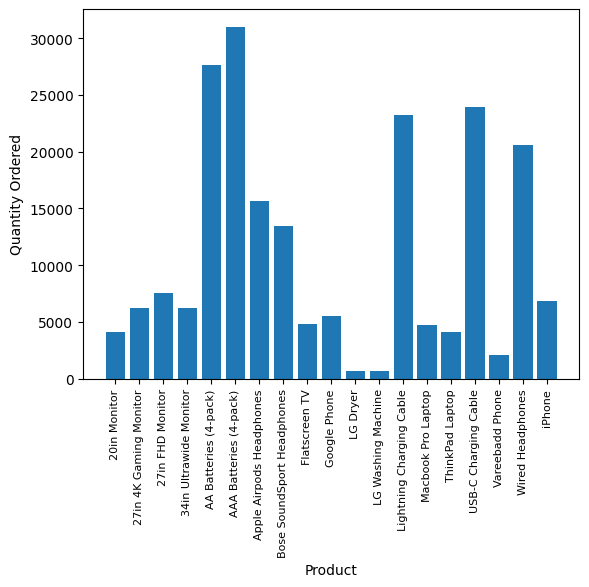

In [75]:
product_grouped = all_month_data.groupby('Product')
product_quantity = product_grouped.sum()['Quantity Ordered']

product_quantity

product = [product for product, df in product_grouped]   # .unique() dont work because the order of Sales and city matter.

plt.bar(product, product_quantity)
plt.xticks(product, rotation='vertical', size=8)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

now that we know which product has the highest sales, we need to find the reason why and prove it

now it seems that the price of the product might be the reason for high sales, but need to proove it by showing some kind of corelation. 

In [74]:
prices = all_month_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/2284890729.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_month_data.groupby('Product').mean()['Price Each']


/var/folders/q4/hs1ztynn2ps864bf7zxv_8z00000gn/T/ipykernel_67359/223740542.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=6)


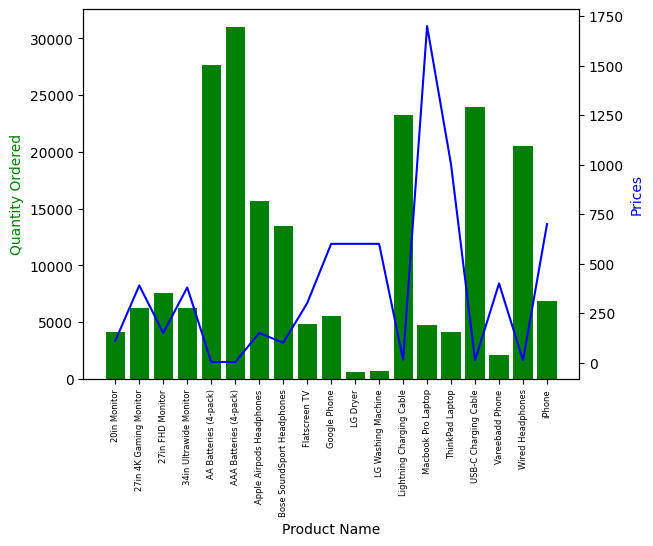

In [83]:
# now lets plot an overlay of the prices on our bar graph

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, product_quantity, color='g')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='b')

ax1.set_xticklabels(product, rotation='vertical', size=6)

plt.show()